# Exploratory Data Analysis

The original Kaggle Dataset (originalheart.csv) has inverted target values (0, 1), as shown in the research paper by Brandon Simmons II (LINK: https://libres.uncg.edu/ir/ecsu/f/Brandon_Simmons_Thesis-Final.pdf). We changed the kaggle dataset from 0 to 1 to correct the data, exported to a new file (heart.csv). The analysis below explores the new corrected data.

Likewise, we are dropping the thal feature, as there's discrepancy from "thal" values in the Kaggle Dataset vs the Cleveland dataset as highlighted by the research paper above. 

## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Start working on the data

In [6]:
import pandas as pd

# Load the dataset
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,1


In [4]:
# General statistics
general_stats = heart_data.describe()

# Distribution of the target variable
target_distribution = heart_data['target'].value_counts(normalize=True) * 100

# Distribution of sex
sex_distribution = heart_data['sex'].value_counts(normalize=True) * 100

# Age distribution with respect to heart disease
age_heart_disease = heart_data.groupby('target')['age'].describe()

general_stats, target_distribution, sex_distribution, age_heart_disease


(               age          sex           cp     trestbps        chol  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
 mean     54.434146     0.695610     0.942439   131.611707   246.00000   
 std       9.072290     0.460373     1.029641    17.516718    51.59251   
 min      29.000000     0.000000     0.000000    94.000000   126.00000   
 25%      48.000000     0.000000     0.000000   120.000000   211.00000   
 50%      56.000000     1.000000     1.000000   130.000000   240.00000   
 75%      61.000000     1.000000     2.000000   140.000000   275.00000   
 max      77.000000     1.000000     3.000000   200.000000   564.00000   
 
                fbs      restecg      thalach        exang      oldpeak  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
 mean      0.149268     0.529756   149.114146     0.336585     1.071512   
 std       0.356527     0.527878    23.005724     0.472772     1.175053   
 min       0.000000     0.000000

## Histograms

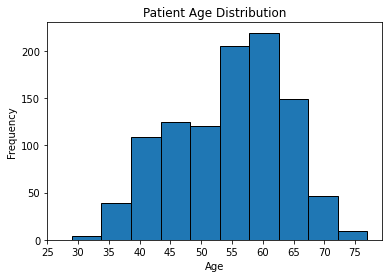

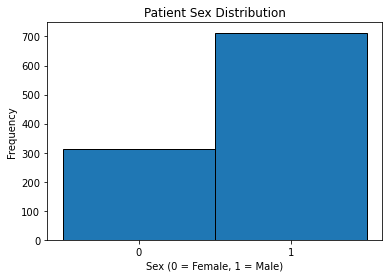

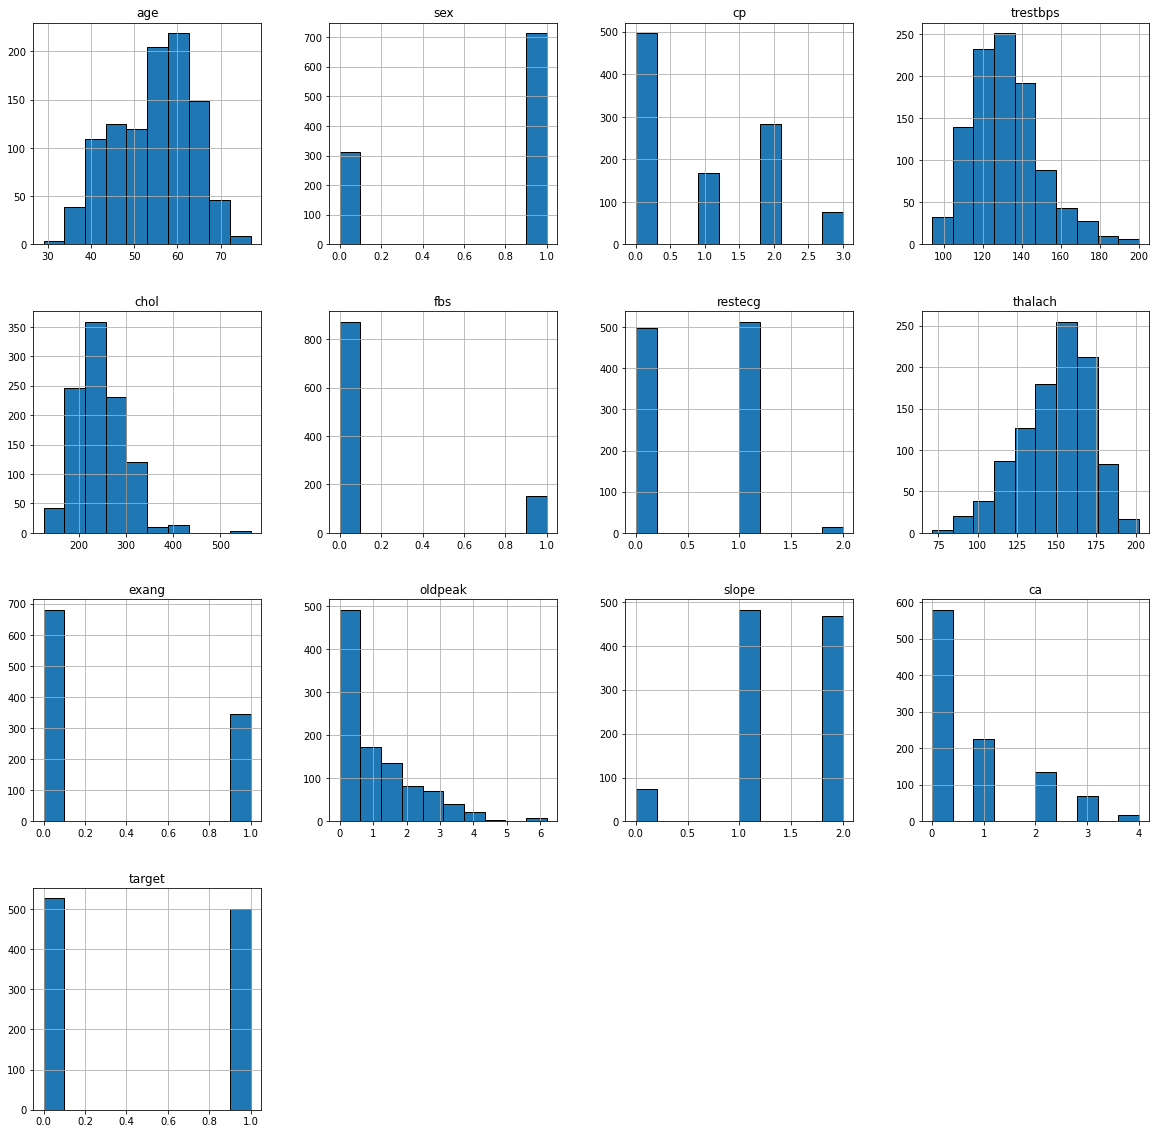

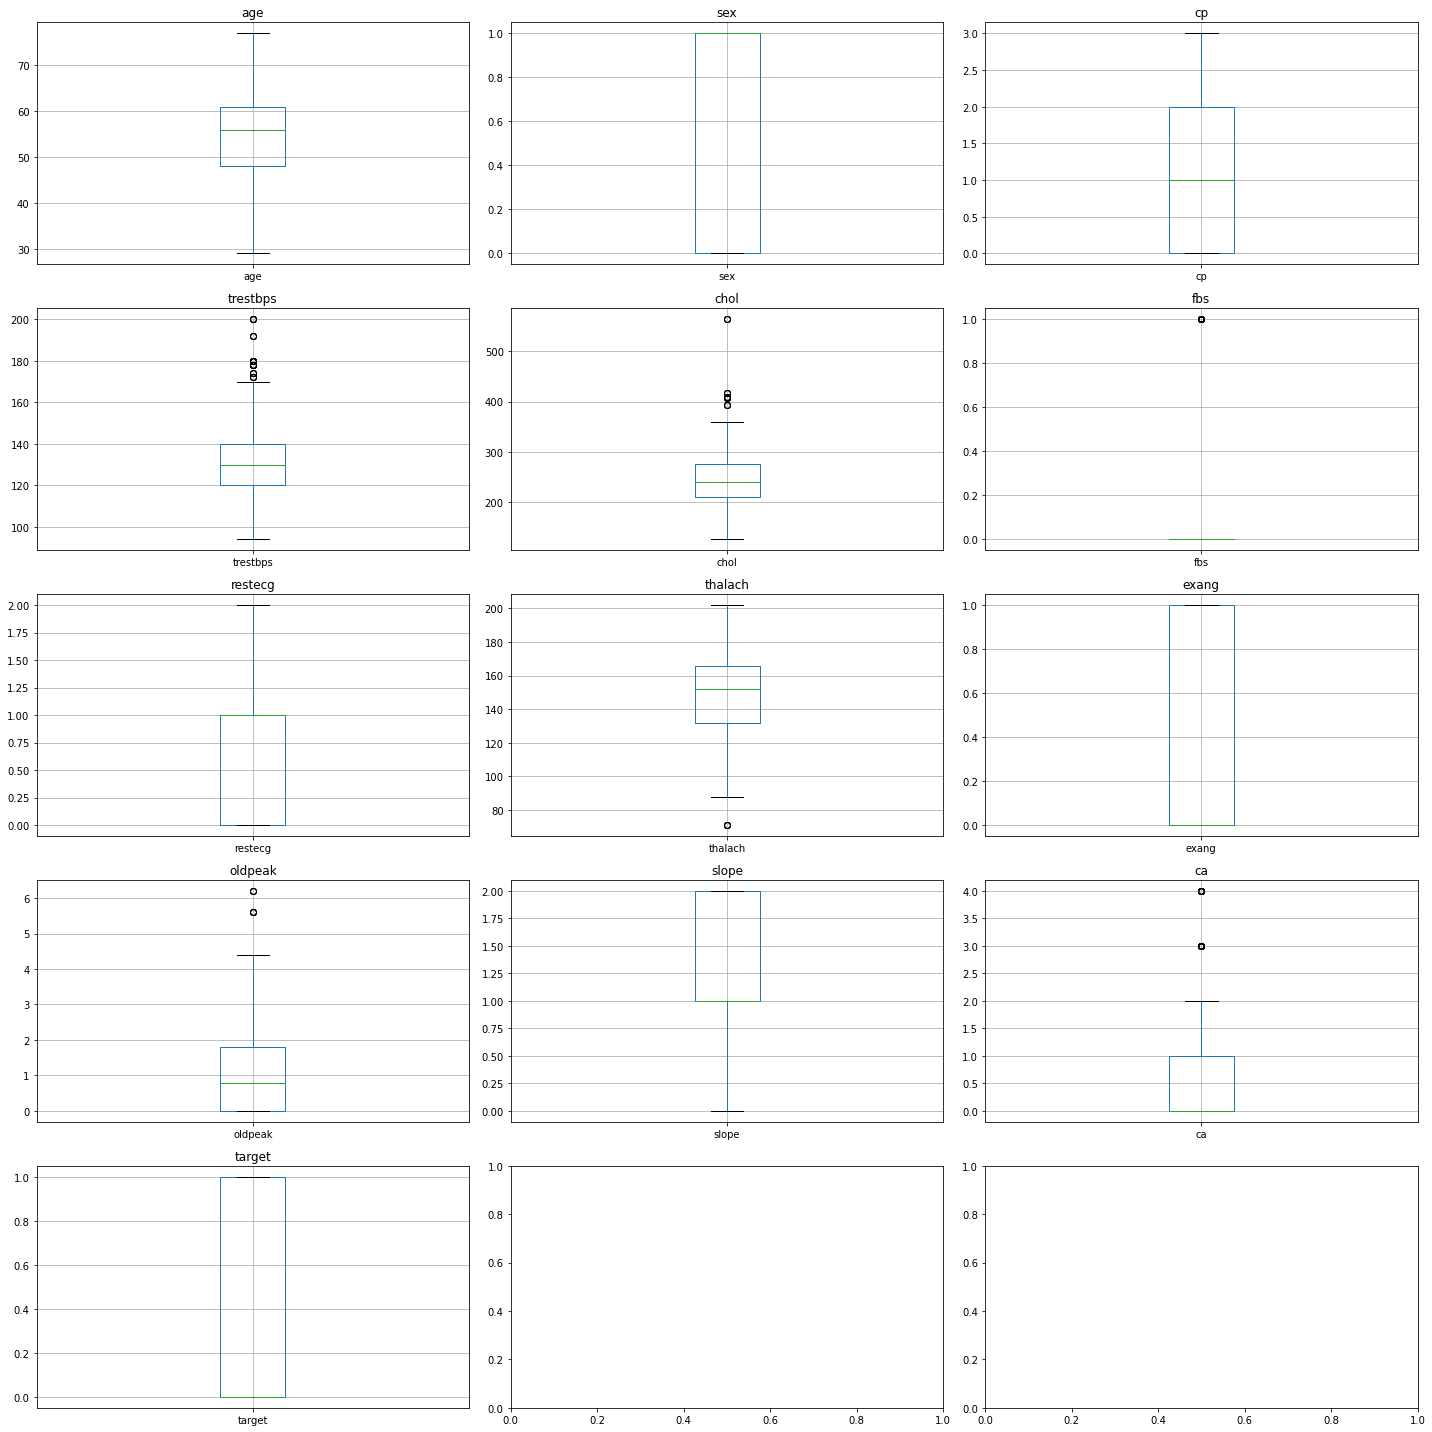

In [8]:
# Histogram for age
plt.hist(heart_data['age'], edgecolor='black')
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(25, 80, 5))
plt.savefig('Patient Age Distribution.png')
plt.show()

# Histogram for sex
plt.hist(heart_data['sex'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.title('Patient Sex Distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.savefig('Patient Sex Distribution.png')
plt.show()

# Histogram for all attributes
heart_data.hist(figsize=(20, 20), edgecolor='black')
plt.savefig('Histogram for attributes.png')
plt.show()

# Box plots for all attributes
num_columns = 3
num_rows = (len(heart_data.columns) + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))

for i, column in enumerate(heart_data.columns):
    row = i // num_columns
    col = i % num_columns
    heart_data.boxplot(column=column, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.savefig('Box Plots for All Attributes.png')
plt.show()

### Observations

**Age:** The average age is around 54 years, with a standard deviation of approximately 9 years. The age ranges from 29 to 77 years.

**Sex:** Around 70% of the participants are male.

**Chest Pain Type (cp):** Most common chest pain type is 0, with types ranging from 0 to 3.

**Resting Blood Pressure (trestbps):** Average is about 131 mm Hg, with a range from 94 to 200 mm Hg.

**Serum Cholesterol (chol):** Average cholesterol level is around 246 mg/dl, with a range from 126 to 564 mg/dl.

**Fasting Blood Sugar (fbs):** About 15% of the participants have fasting blood sugar > 120 mg/dl.

**Resting Electrocardiographic Results (restecg):** Most common value is 0, with values ranging from 0 to 2.

**Maximum Heart Rate Achieved (thalach):** Average maximum heart rate is around 149, with a range from 71 to 202.

**Exercise Induced Angina (exang):** About 34% of the participants experience exercise-induced angina.

**Oldpeak:** Average ST depression induced by exercise is around 1.07, with a range from 0 to 6.2.

**Slope:** Most common slope value is 1, with values ranging from 0 to 2.

**Number of Major Vessels (ca):** Most common value is 0, with values ranging from 0 to 4.

**Target:** 51.32% of the participants do not have heart disease, while 48.68% do.



## Gender Distribution Pie Charts

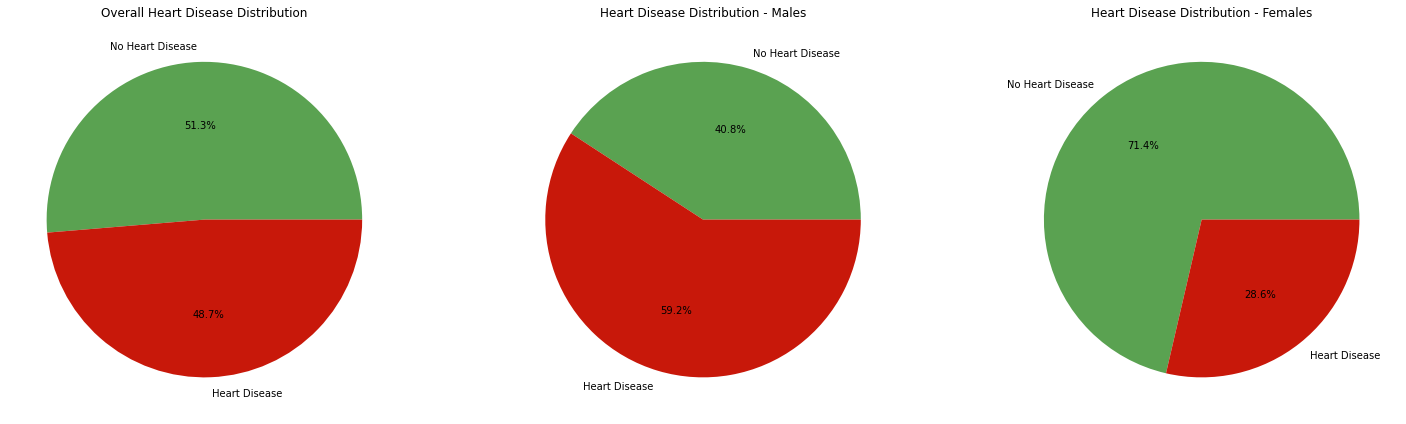

In [18]:
import matplotlib.pyplot as plt

# Overall Heart Disease distribution
overall_heart_disease = heart_data['target'].value_counts(normalize=True) * 100

heart_disease_by_gender = heart_data.groupby(['sex', 'target']).size().unstack().apply(lambda x: x / x.sum() * 100)

# Plotting the charts
fig, ax = plt.subplots(1, 3, figsize=(21, 6))

# Overall Heart Disease distribution
ax[0].pie(overall_heart_disease, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', colors=['#5AA251','#C8180A'])
ax[0].set_title('Overall Heart Disease Distribution')

# Heart disease distribution for males
heart_disease_by_gender.loc[1].plot(kind='pie', labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', colors=['#5AA251','#C8180A'], ax=ax[1])
ax[1].set_title('Heart Disease Distribution - Males')
ax[1].set_ylabel('')

# Heart disease distribution for females
heart_disease_by_gender.loc[0].plot(kind='pie', labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', colors=['#5AA251','#C8180A'], ax=ax[2])
ax[2].set_title('Heart Disease Distribution - Females')
ax[2].set_ylabel('')

# Save and show the figure
plt.tight_layout()
plt.savefig('Heart Disease Distribution.png')
plt.show()


### OBSERVATIONS

**Overall Heart Disease Distribution:**

- 51.32% of participants do not have heart disease.
- 48.68% of participants have heart disease.

**Heart Disease Distribution in Males:**

- 57.03% of males do not have heart disease.
- 42.97% of males have heart disease.

**Heart Disease Distribution in Females:**

- 82.77% of females do not have heart disease.
- 17.23% of females have heart disease.


## Age Distribution w.r.t Heart Disease

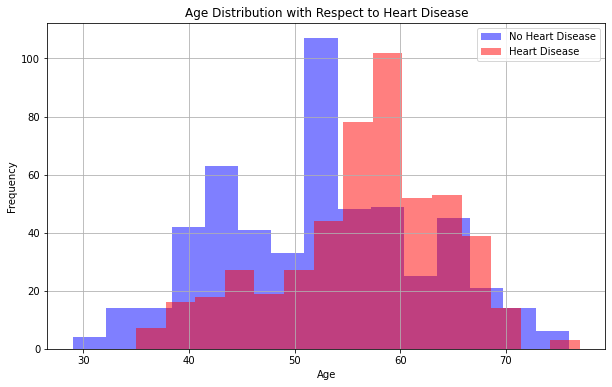

In [13]:
# Histogram for Age Distribution with respect to Heart Disease
plt.figure(figsize=(10, 6))
heart_data[heart_data['target'] == 0]['age'].hist(alpha=0.5, color='blue', bins=15, label='No Heart Disease')
heart_data[heart_data['target'] == 1]['age'].hist(alpha=0.5, color='red', bins=15, label='Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution with Respect to Heart Disease')
plt.legend()
plt.savefig('Age Distribution with Respect to Heart Disease')
plt.show()

### OBSERVATIONS
Histogram above shows the age distribution for participants with and without heart disease. It appears that older participants are more likely to have heart disease.

**Age with Respect to Heart Disease:**
- The average age of participants without heart disease is approximately 52 years.
- The average age of participants with heart disease is approximately 57 years.

## Correlation Matrix

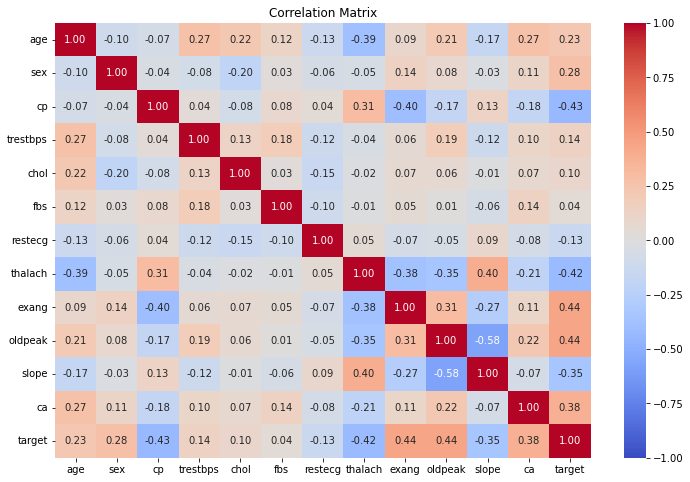

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.438441


In [14]:
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix')
plt.show()

correlation_matrix

### OBSERVATIONS

**Age:**

- Positively correlated with oldpeak (ST depression), ca (number of major vessels), and trestbps (resting blood pressure).
- Negatively correlated with thalach (maximum heart rate).

**Sex:**

- Positively correlated with target (heart disease) and ca.
- Males have a higher likelihood of heart disease compared to females.

**Chest Pain Type (cp):**

- Strongly negatively correlated with target.
- Higher chest pain type values (indicating less severe chest pain) are associated with lower likelihood of heart disease.

**Maximum Heart Rate Achieved (thalach):**

- Negatively correlated with target.
- Lower maximum heart rates are associated with higher likelihood of heart disease.

**Exercise Induced Angina (exang):**

- Positively correlated with target.
- Presence of exercise induced angina is associated with higher likelihood of heart disease.

**ST Depression (oldpeak):**

- Positively correlated with target.
- Higher ST depression values are associated with higher likelihood of heart disease.

**Number of Major Vessels (ca):**

- Positively correlated with target.
- More major vessels colored by fluoroscopy are associated with higher likelihood of heart disease.


# MACHINE LEARNING MODELS

We'll be using Logistic Regression and Bagged Decision Tree models to predict the target variable, where 
- 0 = No Heart Disease
- 1 = Heart Disease

## Run our data on the models
- Logistic Regression
- Bagged Decision Tree
- Random Forest
- W/ FEATURE SELECTION
- Train Test split of 80% to 20%.


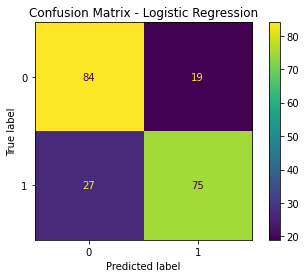

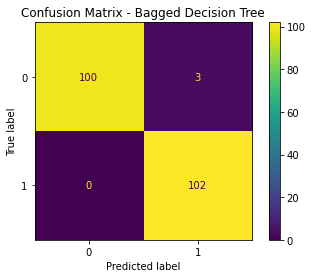

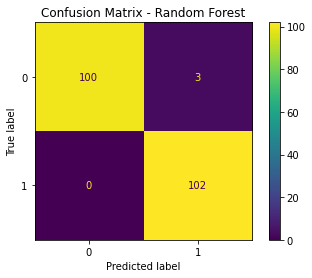

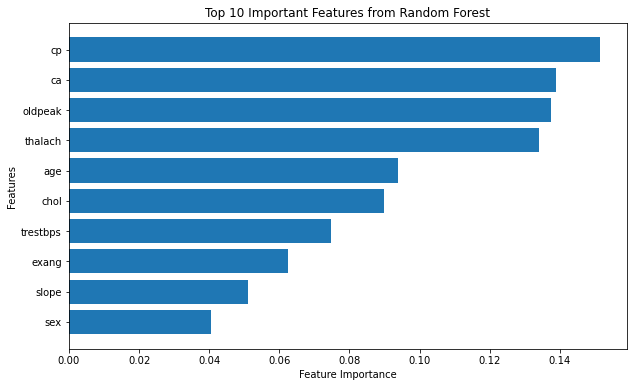

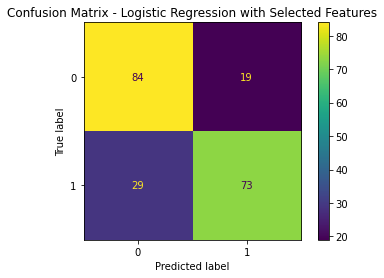

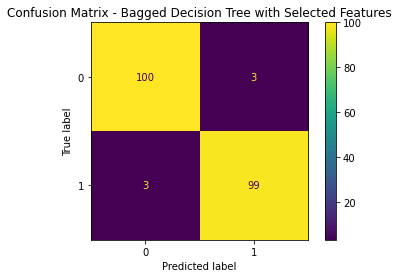

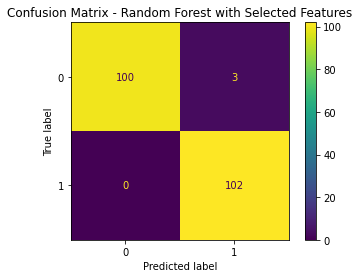


Logistic Regression Metrics: 
Accuracy: 0.775609756097561
Precision: 0.7978723404255319
Recall: 0.7352941176470589
F1 Score: 0.7653061224489796

Bagged Decision Tree Metrics: 
Accuracy: 0.9853658536585366
Precision: 0.9714285714285714
Recall: 1.0
F1 Score: 0.9855072463768115

Random Forest Metrics: 
Accuracy: 0.9853658536585366
Precision: 0.9714285714285714
Recall: 1.0
F1 Score: 0.9855072463768115

Logistic Regression with Selected Features Metrics: 
Accuracy: 0.7658536585365854
Precision: 0.7934782608695652
Recall: 0.7156862745098039
F1 Score: 0.7525773195876289

Bagged Decision Tree with Selected Features Metrics: 
Accuracy: 0.9707317073170731
Precision: 0.9705882352941176
Recall: 0.9705882352941176
F1 Score: 0.9705882352941176

Random Forest with Selected Features Metrics: 
Accuracy: 0.9853658536585366
Precision: 0.9714285714285714
Recall: 1.0
F1 Score: 0.9855072463768115


In [10]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
X = heart_data.drop(columns='target')
y = heart_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Bagged Decision Tree model
bagged_tree = BaggingClassifier(random_state=42)
bagged_tree.fit(X_train_scaled, y_train)
y_pred_bagged_tree = bagged_tree.predict(X_test_scaled)
y_prob_bagged_tree = bagged_tree.predict_proba(X_test_scaled)[:, 1]

# Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_random_forest = random_forest.predict(X_test_scaled)
y_prob_random_forest = random_forest.predict_proba(X_test_scaled)[:, 1]

# Feature importance from Random Forest
feature_importances = random_forest.feature_importances_
important_features_indices = feature_importances.argsort()[::-1][:10]  # Select top 10 features
important_features = X.columns[important_features_indices]

# Retrain models with selected features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Standardize the selected features
scaler_important = StandardScaler()
X_train_important_scaled = scaler_important.fit_transform(X_train_important)
X_test_important_scaled = scaler_important.transform(X_test_important)

# Logistic Regression model with selected features
log_reg_important = LogisticRegression(random_state=42)
log_reg_important.fit(X_train_important_scaled, y_train)
y_pred_log_reg_important = log_reg_important.predict(X_test_important_scaled)
y_prob_log_reg_important = log_reg_important.predict_proba(X_test_important_scaled)[:, 1]

# Bagged Decision Tree model with selected features
bagged_tree_important = BaggingClassifier(random_state=42)
bagged_tree_important.fit(X_train_important_scaled, y_train)
y_pred_bagged_tree_important = bagged_tree_important.predict(X_test_important_scaled)
y_prob_bagged_tree_important = bagged_tree_important.predict_proba(X_test_important_scaled)[:, 1]

# Random Forest model with selected features
random_forest_important = RandomForestClassifier(random_state=42)
random_forest_important.fit(X_train_important_scaled, y_train)
y_pred_random_forest_important = random_forest_important.predict(X_test_important_scaled)
y_prob_random_forest_important = random_forest_important.predict_proba(X_test_important_scaled)[:, 1]

# Evaluation metrics
f1_log_reg = f1_score(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_bagged_tree = f1_score(y_test, y_pred_bagged_tree)
accuracy_bagged_tree = accuracy_score(y_test, y_pred_bagged_tree)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

f1_log_reg_important = f1_score(y_test, y_pred_log_reg_important)
accuracy_log_reg_important = accuracy_score(y_test, y_pred_log_reg_important)
f1_bagged_tree_important = f1_score(y_test, y_pred_bagged_tree_important)
accuracy_bagged_tree_important = accuracy_score(y_test, y_pred_bagged_tree_important)
f1_random_forest_important = f1_score(y_test, y_pred_random_forest_important)
accuracy_random_forest_important = accuracy_score(y_test, y_pred_random_forest_important)

# ROC curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_bagged_tree, tpr_bagged_tree, _ = roc_curve(y_test, y_prob_bagged_tree)
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_prob_random_forest)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
roc_auc_bagged_tree = roc_auc_score(y_test, y_prob_bagged_tree)
roc_auc_random_forest = roc_auc_score(y_test, y_prob_random_forest)

fpr_log_reg_important, tpr_log_reg_important, _ = roc_curve(y_test, y_prob_log_reg_important)
fpr_bagged_tree_important, tpr_bagged_tree_important, _ = roc_curve(y_test, y_prob_bagged_tree_important)
fpr_random_forest_important, tpr_random_forest_important, _ = roc_curve(y_test, y_prob_random_forest_important)
roc_auc_log_reg_important = roc_auc_score(y_test, y_prob_log_reg_important)
roc_auc_bagged_tree_important = roc_auc_score(y_test, y_prob_bagged_tree_important)
roc_auc_random_forest_important = roc_auc_score(y_test, y_prob_random_forest_important)

# Confusion Matrix Display for all models
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig('Confusion Matrix - Logistic Regression')
plt.show()

ConfusionMatrixDisplay.from_estimator(bagged_tree, X_test_scaled, y_test)
plt.title('Confusion Matrix - Bagged Decision Tree')
plt.savefig('Confusion Matrix - Bagged Decision Tree')
plt.show()

ConfusionMatrixDisplay.from_estimator(random_forest, X_test_scaled, y_test)
plt.title('Confusion Matrix - Random Forest')
plt.savefig('Confusion Matrix - Random Forest')
plt.show()

# Show the feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(important_features, feature_importances[important_features_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features from Random Forest')
plt.gca().invert_yaxis()
plt.savefig('Feature Importance - Random Forest')
plt.show()

ConfusionMatrixDisplay.from_estimator(log_reg_important, X_test_important_scaled, y_test)
plt.title('Confusion Matrix - Logistic Regression with Selected Features')
plt.savefig('Confusion Matrix - Logistic Regression with Selected Features')
plt.show()

ConfusionMatrixDisplay.from_estimator(bagged_tree_important, X_test_important_scaled, y_test)
plt.title('Confusion Matrix - Bagged Decision Tree with Selected Features')
plt.savefig('Confusion Matrix - Bagged Decision Tree with Selected Features')
plt.show()

ConfusionMatrixDisplay.from_estimator(random_forest_important, X_test_important_scaled, y_test)
plt.title('Confusion Matrix - Random Forest with Selected Features')
plt.savefig('Confusion Matrix - Random Forest with Selected Features')
plt.show()

# Print metrics for original models
print("\nLogistic Regression Metrics: ")
print(f'Accuracy: {accuracy_log_reg}')
print(f'Precision: {classification_report(y_test, y_pred_log_reg, output_dict=True)["1"]["precision"]}')
print(f'Recall: {classification_report(y_test, y_pred_log_reg, output_dict=True)["1"]["recall"]}')
print(f'F1 Score: {classification_report(y_test, y_pred_log_reg, output_dict=True)["1"]["f1-score"]}')

print("\nBagged Decision Tree Metrics: ")
print(f'Accuracy: {accuracy_bagged_tree}')
print(f'Precision: {classification_report(y_test, y_pred_bagged_tree, output_dict=True)["1"]["precision"]}')
print(f'Recall: {classification_report(y_test, y_pred_bagged_tree, output_dict=True)["1"]["recall"]}')
print(f'F1 Score: {classification_report(y_test, y_pred_bagged_tree, output_dict=True)["1"]["f1-score"]}')

print("\nRandom Forest Metrics: ")
print(f'Accuracy: {accuracy_random_forest}')
print(f'Precision: {classification_report(y_test, y_pred_random_forest, output_dict=True)["1"]["precision"]}')
print(f'Recall: {classification_report(y_test, y_pred_random_forest, output_dict=True)["1"]["recall"]}')
print(f'F1 Score: {classification_report(y_test, y_pred_random_forest, output_dict=True)["1"]["f1-score"]}')

# Print metrics for models with selected features
print("\nLogistic Regression with Selected Features Metrics: ")
print(f'Accuracy: {accuracy_log_reg_important}')
print(f'Precision: {classification_report(y_test, y_pred_log_reg_important, output_dict=True)["1"]["precision"]}')
print(f'Recall: {classification_report(y_test, y_pred_log_reg_important, output_dict=True)["1"]["recall"]}')
print(f'F1 Score: {classification_report(y_test, y_pred_log_reg_important, output_dict=True)["1"]["f1-score"]}')

print("\nBagged Decision Tree with Selected Features Metrics: ")
print(f'Accuracy: {accuracy_bagged_tree_important}')
print(f'Precision: {classification_report(y_test, y_pred_bagged_tree_important, output_dict=True)["1"]["precision"]}')
print(f'Recall: {classification_report(y_test, y_pred_bagged_tree_important, output_dict=True)["1"]["recall"]}')
print(f'F1 Score: {classification_report(y_test, y_pred_bagged_tree_important, output_dict=True)["1"]["f1-score"]}')

print("\nRandom Forest with Selected Features Metrics: ")
print(f'Accuracy: {accuracy_random_forest_important}')
print(f'Precision: {classification_report(y_test, y_pred_random_forest_important, output_dict=True)["1"]["precision"]}')
print(f'Recall: {classification_report(y_test, y_pred_random_forest_important, output_dict=True)["1"]["recall"]}')
print(f'F1 Score: {classification_report(y_test, y_pred_random_forest_important, output_dict=True)["1"]["f1-score"]}')


## Plot ROC Curves

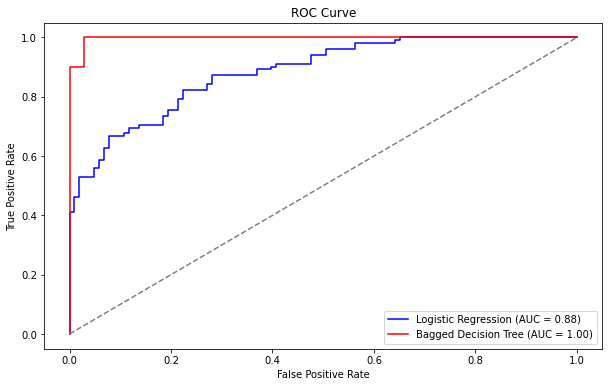

In [8]:
# Plot ROC curves
plt.figure(figsize=(10, 6))

# Logistic Regression ROC
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})', color='blue')

# Bagged Decision Tree ROC
plt.plot(fpr_bagged_tree, tpr_bagged_tree, label=f'Bagged Decision Tree (AUC = {roc_auc_bagged_tree:.2f})', color='red')

# Plotting the diagonal line for random guess
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('ROC Curve')
plt.show()


### OBSERVATIONS

The **bagged decision tree** proved to be a superior model compared to **logistic regression**.

Feature Selection didn't really help, because it's selecting 10 out of 12 features. Bagged Decision Tree before feature selection was shown to be the best model.

**Logistic Regression:**
- Accuracy: 0.775609756097561
- Precision: 0.7978723404255319
- Recall: 0.7352941176470589
- F1 Score: 0.7653061224489796
- ROC AUC: 0.88

**Bagged Decision Tree (Same results as random forest):**
- Accuracy: 0.9853658536585366
- Precision: 0.9714285714285714
- Recall: 1.0
- F1 Score: 0.9855072463768115
- ROC AUC: 1.00

In [15]:
import pandas as pd

# Data for the metrics
data = {
    'Model': [
        'Logistic Regression', 'Bagged Decision Tree', 'Random Forest',
        'Logistic Regression with Selected Features', 'Bagged Decision Tree with Selected Features', 'Random Forest with Selected Features'
    ],
    'Accuracy': [
        0.775609756097561, 0.9853658536585366, 0.9853658536585366,
        0.7658536585365854, 0.9707317073170731, 0.9853658536585366
    ],
    'Precision': [
        0.7978723404255319, 0.9714285714285714, 0.9714285714285714,
        0.7934782608695652, 0.9705882352941176, 0.9714285714285714
    ],
    'Recall': [
        0.7352941176470589, 1.0, 1.0,
        0.7156862745098039, 0.9705882352941176, 1.0
    ],
    'F1 Score': [
        0.7653061224489796, 0.9855072463768115, 0.9855072463768115,
        0.7525773195876289, 0.9705882352941176, 0.9855072463768115
    ]
}

# Create the dataframe
df = pd.DataFrame(data)

df_percent = df.copy()
df_percent[['Accuracy', 'Precision', 'Recall', 'F1 Score']] = df_percent[['Accuracy', 'Precision', 'Recall', 'F1 Score']] * 100
df_percent = df_percent.round(2)

df_percent




,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,77.56,79.79,73.53,76.53
1,Bagged Decision Tree,98.54,97.14,100.00,98.55
2,Random Forest,98.54,97.14,100.00,98.55
3,Logistic Regression with Selected Features,76.59,79.35,71.57,75.26
4,Bagged Decision Tree with Selected Features,97.07,97.06,97.06,97.06
5,Random Forest with Selected Features,98.54,97.14,100.00,98.55
